<a href="https://colab.research.google.com/github/HoussamEldineKhaled/machine_learning_project/blob/main/Boston_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# LAS 205: Digital Cultures
### Module II: Fundamentals of Deep Learning


*Quiz: Predicting the median value of homes in various Boston suburbs*



In [ ]:
print("Ready?")

Ready?



This Python code uses TensorFlow and Keras to create, train, and evaluate a neural network model on the Boston Housing dataset. The goal is to predict the median value of homes in various Boston suburbs in the mid-1970s, based on data points such as crime rate, property tax rate, room number, etc.

### Imports and Logging Configuration


TensorFlow and Keras libraries are imported to build and train the model.

NumPy is imported for numerical operations.

Logging for TensorFlow is set to ERROR level to reduce console output clutter, showing only error messages.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# TODO: import numpy as np
import numpy as np

import logging
tf.get_logger().setLevel(logging.ERROR)

### Data Preparation


The Boston Housing dataset is loaded from Keras datasets.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$). The attributes themselves are defined in the [StatLib website](https://lib.stat.cmu.edu/datasets/boston) (including features such as crime rate, average number of rooms, etc.). You can also download the csv file from [Kaggle](https://www.kaggle.com/datasets/altavish/boston-housing-dataset).

The data is split into training and testing sets.

Feature data (raw_x_train and raw_x_test) is standardized by subtracting the mean and dividing by the standard deviation of the training data features. This is a common practice to facilitate model training by scaling input features to a similar range.

In [ ]:
# TODO: Load the Boston Housing dataset from Keras's datasets module.
from tensorflow.keras.datasets import boston_housing

#boston_housing =
(raw_x_train, y_train), (raw_x_test, y_test) = boston_housing.load_data()


# TODO: Calculate the mean and standard deviation of the features in the training data using mean and std methods available in numpy library
x_mean = np.mean(raw_x_train , axis=0)
x_stddev = np.std(raw_x_train, axis=0)

# TODO: Standardize the training data:

# The training data (raw_x_train) is standardized by subtracting the mean and dividing by the standard deviation of each feature.
x_train = (raw_x_train - x_mean)/x_stddev

# TODO: Standardize the test data: Similar to the previous step
x_test = (raw_x_test - x_mean)/x_stddev

### Creating the model


A sequential neural network model is created with Keras, consisting of several layers:

*   Input Layer: This layer should contain 128 neurons, use the relu activation function, and expect input images with a shape of [13] reflecting the 13 features in the dataset.
*   Hidden Layers: Two dense layers with 128, and 64 neurons, respectively. The dense layers use the ReLU activation function.
*   Output Layer: A single neuron with a linear activation function to predict the median house value, which is a regression task.


In [ ]:
model = Sequential()

# TODO: Build a model following the guidelines above.
model.add(Dense(units = 128,activation = 'relu', input_shape =[13]))

# TODO: Add the first hidden layer

model.add(Dense(units = 128, activation = 'relu'))
# TODO: Add the second hidden layer
model.add(Dense(units = 64, activation = 'relu'))


# TODO: Add the output layer
model.add(Dense(units = 1 , activation = 'softmax'))


## Summarizing the Model

Write the code in the cell below to summarize the model you just created:

In [ ]:
# TODO: Summarize the model.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1792      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 26625 (104.00 KB)
Trainable params: 26625 (104.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compiling the Model

The model is compiled with the Adam optimizer and mean squared error loss function, focusing on mean absolute error as a metric for evaluation.

In [ ]:
# TODO: Compile the model.
model.compile(optimizer = 'Adam', loss='mean_squared_error', metrics = ['mean_absolute_error'])


## Training the model

The model is trained on the prepared data for a specified number of epochs (EPOCHS) and batch size (BATCH_SIZE), with verbosity set to 2 (showing less output for each epoch).

Validation data is also provided to evaluate the model on the testing set during training.

In [ ]:
EPOCHS = 500
BATCH_SIZE = 16

# TODO: complete the following code
history = model.fit(x_train ,  y_train    , epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/500
26/26 - 2s - loss: 542.3704 - mean_absolute_error: 21.3951 - val_loss: 570.7009 - val_mean_absolute_error: 22.0784 - 2s/epoch - 65ms/step
Epoch 2/500
26/26 - 0s - loss: 542.3704 - mean_absolute_error: 21.3950 - val_loss: 570.7009 - val_mean_absolute_error: 22.0784 - 134ms/epoch - 5ms/step
Epoch 3/500
26/26 - 0s - loss: 542.3704 - mean_absolute_error: 21.3951 - val_loss: 570.7009 - val_mean_absolute_error: 22.0784 - 98ms/epoch - 4ms/step
Epoch 4/500
26/26 - 0s - loss: 542.3704 - mean_absolute_error: 21.3951 - val_loss: 570.7009 - val_mean_absolute_error: 22.0784 - 97ms/epoch - 4ms/step
Epoch 5/500
26/26 - 0s - loss: 542.3704 - mean_absolute_error: 21.3950 - val_loss: 570.7009 - val_mean_absolute_error: 22.0784 - 85ms/epoch - 3ms/step
Epoch 6/500
26/26 - 0s - loss: 542.3704 - mean_absolute_error: 21.3950 - val_loss: 570.7009 - val_mean_absolute_error: 22.0784 - 94ms/epoch - 4ms/step
Epoch 7/500
26/26 - 0s - loss: 542.3704 - mean_absolute_error: 21.3950 - val_loss: 570.7009 - 

### Evaluation and Prediction


After training, the model makes predictions on the testing set. The first four predictions and their corresponding true values are printed out to demonstrate the model's performance.

In [ ]:
# TODO: Calculate predictions using predict method on model with x_test as the input.
# Note: The predict method returns predictions, an array of predicted values for the test dataset.

predictions = model.predict(x_test)
# Print the first 4 predictions.
for i in range(0, 4):
    print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

4/4 [==============================] - 0s 3ms/step
Prediction:  0.99999994 , true value:  7.2
Prediction:  0.99999994 , true value:  18.8
Prediction:  0.99999994 , true value:  19.0
Prediction:  0.99999994 , true value:  27.0


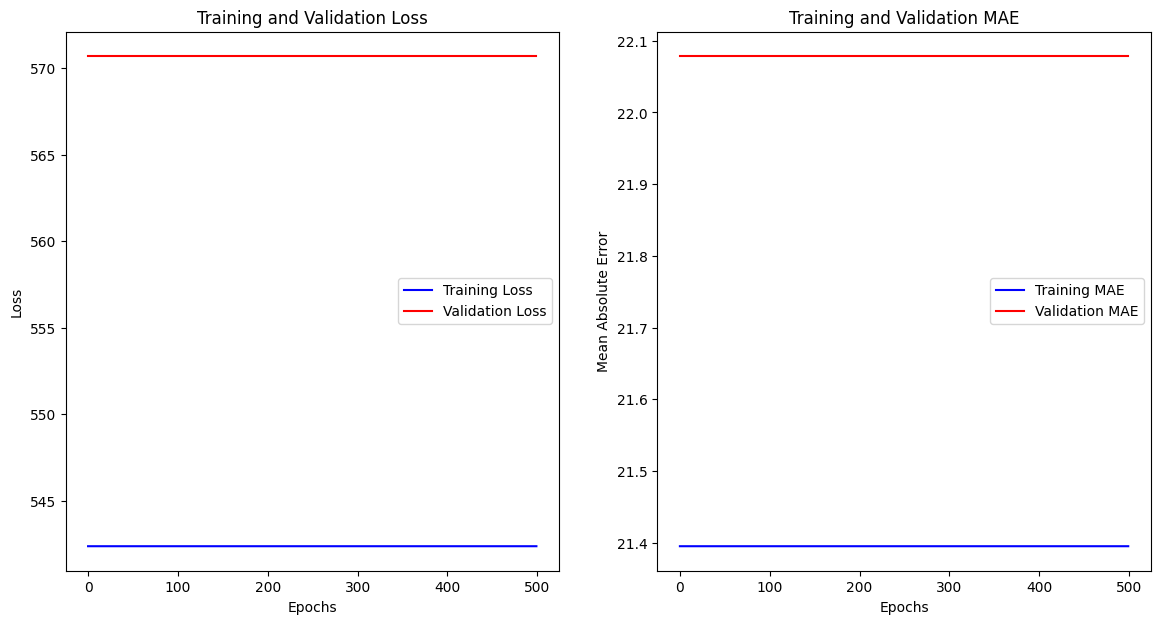

In [ ]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy from the training history
training_loss = history.history['loss']
val_loss = history.history['val_loss']

# TODO: Similarly extract the mean absolute error metrics for both training and validation phases.
training_error = history.history['mean_absolute_error']
val_error = history.history['val_mean_absolute_error']



epochs = range(1, len(training_loss) + 1)

# Plotting training and validation loss
# TODO: Set the size of the figure to 14x7 inches
plt.figure(figsize=(14 , 7))
# The first subplot is designated for plotting training and validation loss.
plt.subplot(1, 2, 1)       # Indicate that there will be 1 row, 2 columns, and this is the first subplot.

# TODO: Generate a plot of the training loss over epochs with a solid blue line. Label this plot as "Training Loss" for legend purposes

plt.plot(training_loss, 'b')


# TODO: Generate a plot of the validation loss over epochs with a solid red line. Label this plot as "Validation Loss" for legend purposes
plt.plot(val_loss, 'r')



# TODO: Set title as 'Training and Validation Loss' , x-label as 'Epochs', and y-label as 'Loss'.
plt.title("Training and Validation Loss")

plt.xlabel("Epochs")

plt.ylabel("Loss")

# Display the legend using the legend() method.
plt.legend(["Training Loss","Validation Loss"])

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)                 # Indicate that there will be 1 row, 2 columns, and this is the second subplot.

# TODO: Generate a plot of the training mae over epochs with a solid blue line. Label this plot as "Training MAE" for legend purposes
plt.plot(training_error, 'b')

# TODO: Generate a plot of the validation mae over epochs with a solid red line. Label this plot as "Validation MAE" for legend purposes
plt.plot(val_error,'r')
# TODO: Set title as 'Training and Validation MAE' , x-label as 'Epochs', and y-label as 'Mean Absolute Error'.
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
# Display the legend using the legend() method.
plt.legend(["Training MAE", "Validation MAE"])
# TODO: Show the two subplots
plt.show()


## Discussion: What happened?

TODO: Insert your answer.

## Summary

In this quiz, you built your own neural network to predict the median value of homes in various Boston suburbs in the mid-1970s. Congrats!

At this point we should be getting somewhat familiar with the process of loading data (incuding labels), preparing it, creating a model, and then training the model with prepared data.

Congratulations! You have successfully completed the lab!